# Convolution Implementation Visualisations

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [25]:
dataframe = pd.read_csv("./ConvTimes.csv")
dataframe.fillna(0)

,Thread Num,Linear Implementation,MPI,Pthreads,Cuda (1 block),CUDA (2 blocks),CUDA (4 blocks),CUDA (8 blocks)
0,1,2.48829,2.480580,2.568870,6.977220,0.000000,0.000000,0.000000
1,2,0.00000,1.286600,1.327650,3.617330,3.489650,0.000000,0.000000
2,3,0.00000,0.887549,0.886716,1.908850,0.000000,0.000000,0.000000
3,4,0.00000,0.669921,0.792072,1.572730,1.836300,1.754460,0.000000
4,5,0.00000,0.632343,0.707099,1.580160,0.000000,0.000000,0.000000
5,6,0.00000,0.600543,0.649860,1.328350,1.261040,0.000000,0.000000
6,7,0.00000,0.562903,0.606931,1.135500,0.000000,0.000000,0.000000
7,8,0.00000,0.551143,0.587207,1.017080,0.979043,0.920900,0.893831
8,10,0.00000,0.000000,0.582136,0.834294,0.806090,0.000000,0.000000
9,12,0.00000,0.000000,0.575142,0.726024,0.687501,0.638911,0.000000


In [50]:
data_labels = ["Thread Num", "Linear Implementation", 
                "MPI", "Pthreads", "Cuda (1 block)",
                "CUDA (2 blocks)", "CUDA (4 blocks)",
                "CUDA (8 blocks)"]

data_np = dataframe[data_labels].to_numpy().transpose()

In [51]:
linimp_tm = 

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8., 10., 12., 14., 16., 20.,
       24., 28., 32., 40., 48., 56., 64.])

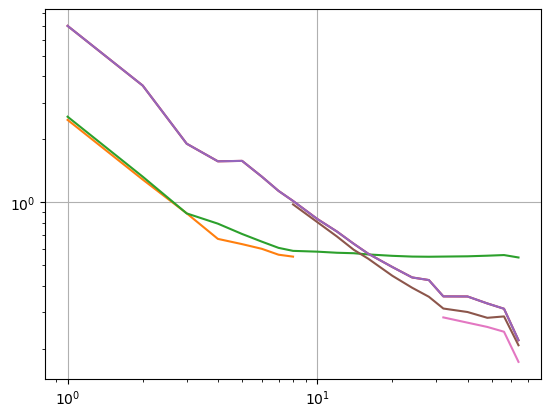

In [67]:
fig1, ax1 = plt.subplots()
ax1.plot(data_np[0], data_np[1])
ax.plot(data_np[0], data_np[2])
ax.plot(data_np[0], data_np[3])
ax.plot(data_np[0], data_np[4])
ax.plot(data_np[0], data_np[4])
ax.plot(data_np[0], data_np[5])
ax.plot(data_np[0], data_np[7])
ax.set_yscale("log")
ax.set_xscale("log")
ax.grid()